In [1]:
import warnings

from opticalglass.glass import get_filepath

import opticalglass as og
import opticalglass.buchdahl as buchdahl
import opticalglass.glass as ogl
from opticalglass.glassfactory import create_glass
from opticalglass import ohara

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build Multi-Index for Ohara

In [2]:
catalog = 'Ohara'
gname = 'S-FPL51'
gname1 = 'S-BSL 7'
gname2 = 'S-NPH53'

In [3]:
cat_pd = ohara.OharaCatalog()
cat_df = cat_pd.df

In [4]:
cat_df

category      NaN         refractive indices                             \
data item Code(d) Code(e)             2325.0   1970.0   1530.0   1129.0   
glass                                                                     
S-FPL51    497816  498810            1.47952  1.48269   1.4861  1.48911   
S-FPL53    439950  440946            1.42512  1.42762  1.43032  1.43269   
S-FPL55    439948  440942            1.42492  1.42747  1.43023  1.43264   
S-FPM2     595677  597674            1.57252  1.57631  1.58045  1.58426   
S-FPM3     538747  539743            1.51738  1.52105    1.525  1.52849   
...           ...     ...                ...      ...      ...      ...   
S-NPH 3    959175  972173            1.87064  1.88002  1.89131  1.90412   
S-NPH 4    893204  903202            1.81864  1.82694  1.83681  1.84777   
S-NPH 5    859227  868225            1.79247  1.80027  1.80944  1.81938   
S-NPH 7    778239  786237            1.72077   1.7275  1.73544  1.74406   
S-NPH53    847239  855237            1.78347  1.79094  1.79971  1.80921   

category                                       ... mechanical properties  \
data item        t        s       A'        r  ...          Abrasion(Aa)   
glass                                          ...                         
S-FPL51     1.4901  1.49183    1.493  1.49407  ...                   449   
S-FPL53    1.43346   1.4348   1.4357  1.43652  ...                   451   
S-FPL55    1.43343  1.43478  1.43569  1.43651  ...                   387   
S-FPM2     1.58557  1.58791  1.58954  1.59105  ...                   488   
S-FPM3     1.52965  1.53167  1.53304   1.5343  ...                   373   
...            ...      ...      ...      ...  ...                   ...   
S-NPH 3    1.90937  1.91984   1.9278  1.93559  ...                   194   
S-NPH 4    1.85218  1.86088  1.86745  1.87383  ...                   213   
S-NPH 5    1.82333  1.83103  1.83681   1.8424  ...                   224   
S-NPH 7    1.74749  1.75417  1.75917    1.764  ...                   448   
S-NPH53    1.81297  1.82029  1.82577  1.83105  ...                   286   

category        chemical properties                                   \
data item     β               RW(P) RA(P) W(S)max W(S)min    SR   PR   
glass                                                                  
S-FPL51    0.74                   1     3       1    <NA>  52.1  4.0   
S-FPL53    0.57                   1     2       3    <NA>  52.3  4.3   
S-FPL55    0.59                   1     2       2    <NA>  52.1  4.1   
S-FPM2     0.51                   1     1       2    <NA>  51.3  4.1   
S-FPM3     0.85                   1     3       1    <NA>   5.1  4.1   
...         ...                 ...   ...     ...     ...   ...  ...   
S-NPH 3    3.35                   1     1       1    <NA>   1.0  1.0   
S-NPH 4    3.39                   1     1       1    <NA>   1.0  1.0   
S-NPH 5    3.18                   1     1       1    <NA>   1.0  1.0   
S-NPH 7    3.45                   1     1       2    <NA>   1.0  1.0   
S-NPH53    3.18                   1     1       1    <NA>   2.3  1.0   

category  Bubble Grp specific gravity  
data item          B                d  
glass                                  
S-FPL51         <NA>             3.62  
S-FPL53            B             3.62  
S-FPL55         <NA>             3.59  
S-FPM2          <NA>             4.17  
S-FPM3          <NA>             3.64  
...              ...              ...  
S-NPH 3         <NA>             3.59  
S-NPH 4         <NA>             3.61  
S-NPH 5         <NA>             3.71  
S-NPH 7         <NA>              3.3  
S-NPH53         <NA>             3.78  

[134 rows x 181 columns]

In [5]:
nd = cat_df['refractive indices']['d'].to_numpy(dtype=float)
nF = cat_df['refractive indices']['F'].to_numpy(dtype=float)
nC = cat_df['refractive indices']['C'].to_numpy(dtype=float)

In [6]:
cat_df.columns.has_duplicates

False

In [7]:
nd, coefs = buchdahl.calc_buchdahl_coords(nd, nF, nC)

In [8]:
coefs /= np.array((nd - 1.0), dtype=float)

## Test Series extracted from DataFrame

In [9]:
gla = cat_df.loc[gname]
gla1 = cat_df.loc[gname1]

In [10]:
cat_df.loc[gname]['dispersion coefficients']

data item
A1      1.170105
A2      0.047571
A3      0.763832
B1      0.006162
B2      0.026337
B3    141.882642
Name: S-FPL51, dtype: object

In [11]:
gla['dispersion coefficients']

data item
A1      1.170105
A2      0.047571
A3      0.763832
B1      0.006162
B2      0.026337
B3    141.882642
Name: S-FPL51, dtype: object

In [12]:
coefs = gla['dispersion coefficients'].to_numpy(dtype=float)

In [13]:
coefs

array([1.17010505e+00, 4.75710783e-02, 7.63832445e-01, 6.16203924e-03,
       2.63372876e-02, 1.41882642e+02])

In [14]:
coefs[3]

0.00616203924

In [15]:
cat_df.loc[gname]['internal transmission mm, 10']

data item
280        0.01
290.0      0.05
300.0      0.17
310.0      0.37
320.0       0.6
330.0      0.77
340.0      0.88
350.0     0.947
360.0     0.975
370       0.988
380.0     0.994
390.0     0.996
400.0     0.995
420.0     0.994
440.0     0.994
460.0     0.996
480.0     0.997
500       0.998
550.0     0.999
600.0     0.998
650.0     0.998
700.0     0.998
800.0     0.999
900.0     0.999
1000.0    0.999
1200      0.999
1400.0    0.999
1600.0    0.999
1800.0    0.999
2000.0    0.999
2200.0    0.997
2400.0    0.996
Name: S-FPL51, dtype: object

In [16]:
cat_df.loc[gname]['refractive indices'].array

<PandasArray>
[1.47952, 1.48269,  1.4861, 1.48911,  1.4901, 1.49183,   1.493, 1.49407,
 1.49514, 1.49543, 1.49571, 1.49694,   1.497, 1.49845, 1.50123, 1.50158,
 1.50407, 1.50451,  1.5072, 1.51176]
Length: 20, dtype: object

## Test factory method, create_glass

In [17]:
gla2 = create_glass(gname2, catalog)

In [18]:
wvls = gla2.glass_data()['refractive indices'].index; wvls

Index([ 2325.0,  1970.0,  1530.0,  1129.0,     't',     's',    'A'',     'r',
           'C',    'C'', 'He-Ne',     'D',     'd',     'e',     'F',    'F'',
       'He-Cd',     'g',     'h',     'i'],
      dtype='object', name='data item')

In [19]:
for w_str in wvls:
    n_line = gla2.meas_rindex(w_str)
    try:
        n_intrp = gla2.rindex(w_str)
    except KeyError:
        print(f'{w_str}: {n_line}, Key error')
    else:
        print(f'{w_str}: {n_line}, {n_intrp:9.6f}, {n_intrp-n_line:8.2g}')

2325.0: 1.78347,  1.783481,  1.1e-05
1970.0: 1.79094,  1.790939, -8.1e-07
1530.0: 1.79971,  1.799705, -4.7e-06
1129.0: 1.80921,  1.809201, -9.2e-06
t: 1.81297,  1.812969, -9.1e-07
s: 1.82029,  1.820291,  1.3e-06
A': 1.82577,  1.825766, -4.1e-06
r: 1.83105,  1.831051,  8.6e-07
C: 1.83654,  1.836536, -3.5e-06
C': 1.83811,  1.838108, -2.1e-06
He-Ne: 1.83959,  1.839590,  1.1e-07
D: 1.84636,  1.846355, -5.1e-06
d: 1.84666,  1.846660, -3.2e-07
e: 1.855,  1.855000, -3.7e-07
F: 1.87199,  1.871985, -4.6e-06
F': 1.8742,  1.874196,   -4e-06
He-Cd: 1.89098,  1.890979, -9.8e-07
g: 1.89403,  1.894027, -2.9e-06
h: 1.91412,  1.914121,  1.1e-06
i: <NA>,  1.953226, <NA>


In [20]:
gla2.meas_rindex(wvls).array

<PandasArray>
[1.78347, 1.79094, 1.79971, 1.80921, 1.81297, 1.82029, 1.82577, 1.83105,
 1.83654, 1.83811, 1.83959, 1.84636, 1.84666,   1.855, 1.87199,  1.8742,
 1.89098, 1.89403, 1.91412,    <NA>]
Length: 20, dtype: object

In [21]:
gla2.rindex(wvls)

array([1.78348095, 1.79093919, 1.7997053 , 1.80920081, 1.81296909,
       1.82029131, 1.82576588, 1.83105086, 1.8365365 , 1.83810795,
       1.83959011, 1.84635485, 1.84665968, 1.85499963, 1.8719854 ,
       1.87419597, 1.89097902, 1.8940271 , 1.91412112, 1.95322585])

In [22]:
gla2.meas_rindex(wvls).array-gla2.rindex(wvls)

<PandasArray>
[-1.0951863969266284e-05,   8.119135965767299e-07,  4.7012731201334645e-06,
   9.194721885208423e-06,   9.059471606231995e-07,  -1.311183077445932e-06,
   4.119607754260457e-06,  -8.591337010699363e-07,  3.5004805130078864e-06,
   2.054953155861128e-06, -1.1401675159561364e-07,   5.148712931335453e-06,
   3.197098692453437e-07,   3.723110117981321e-07,   4.604171530253609e-06,
  4.0339715623449734e-06,   9.777700265001243e-07,   2.904923885438393e-06,
   -1.12012194697364e-06,                    <NA>]
Length: 20, dtype: object

In [23]:
cat_df.loc[gname]['specific gravity']['d']

3.62

In [24]:
cat_df.loc[gname]['chemical properties']

data item
RW(P)         1
RA(P)         3
W(S)max       1
W(S)min    <NA>
SR         52.1
PR          4.0
Name: S-FPL51, dtype: object

In [25]:
cat_df.loc[gname]['thermal properties']

data item
StP（℃）    <NA>
AP（℃）     <NA>
Tg（℃）      458
At（℃）      489
SP（℃）     <NA>
Name: S-FPL51, dtype: object

In [26]:
cat_df.loc[gname1]['internal transmission mm, 10']

data item
280        <NA>
290.0      0.08
300.0      0.31
310.0      0.58
320.0      0.77
330.0      0.88
340.0      0.94
350.0     0.968
360.0     0.984
370       0.991
380.0     0.991
390.0     0.996
400.0     0.997
420.0     0.996
440.0     0.995
460.0     0.995
480.0     0.996
500       0.996
550.0     0.998
600.0     0.997
650.0     0.997
700.0     0.998
800.0     0.998
900.0     0.997
1000.0    0.996
1200      0.995
1400.0    0.982
1600.0    0.991
1800.0     0.98
2000.0    0.961
2200.0     0.89
2400.0     0.85
Name: S-BSL 7, dtype: object

In [27]:
cat_df['refractive indices']['d'].array

<FloatingArray>
[  1.497, 1.43875, 1.43875, 1.59522, 1.53775, 1.48749, 1.51633, 1.60738,
  1.6228, 1.60311,
 ...
 1.85025,  1.7888, 1.80809, 1.80809, 1.92286, 1.95906, 1.89286, 1.85896,
  1.7783, 1.84666]
Length: 134, dtype: Float64

In [28]:
cat_df.loc[gname]['mechanical properties']

data item
Young's (E)       727
Rigidity (G)      280
Poisson's(σ)    0.299
Knoop (Hk)        350
Group               4
Abrasion(Aa)      449
β                0.74
Name: S-FPL51, dtype: object

In [29]:
cat_df.loc[[gname, gname1]]['mechanical properties']['Knoop (Hk)']

glass
S-FPL51    350
S-BSL 7    570
Name: Knoop (Hk), dtype: Int64

In [30]:
trns_data = cat_df.loc[[gname, gname1]]['internal transmission mm, 10'].T

<AxesSubplot:xlabel='data item'>

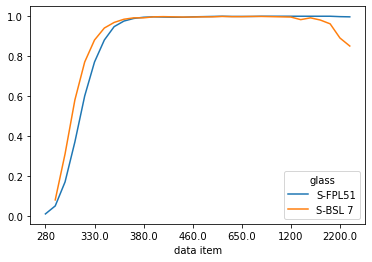

In [31]:
trns_data.plot()

<AxesSubplot:xlabel='data item'>

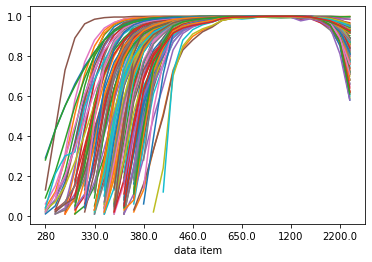

In [32]:
cat_df['internal transmission mm, 10'].T.plot(legend=False)

In [33]:
gla_v2 = ohara.OharaGlass(gname)

In [34]:
gla_v2.meas_rindex('F')

1.50123

In [35]:
gla_v2.glass_code()

'497.816'